In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
style.use('fivethirtyeight')
pd.set_option('display.max_colwidth',250)
pd.set_option('display.max_columns', None)

In [2]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
nba_data = pd.read_csv("training_set.csv", encoding = 'unicode_escape')

In [4]:
nba_data.head()

,Engagements,Followers at Posting,Created,Type,Description
0,502093,36984682,2019-05-21 23:30:51 EDT,Video,The @raptors bench trio of @sergeibaka @normanpowell4 & @fredvanvleet combine for 48 in Game 4!
1,603380,36984682,2019-05-21 22:53:33 EDT,Video,@kyle_lowry7 pulls from deep for the @raptors in the 4th on TNT!
2,603380,36984682,2019-05-21 22:19:58 EDT,Video,@k_mid22 with some english on the @bucks dime!
3,725100,36984682,2019-05-21 22:02:41 EDT,Video,Kawhi punches it home with the left on TNT!
4,661446,36984682,2019-05-21 20:47:49 EDT,Video,@giannis_an34 goes baseline early to rock the rim on TNT!


In [5]:
nba_data.shape

(7766, 5)

In [6]:
nba_data.dtypes

Engagements              int64
Followers at Posting     int64
Created                 object
Type                    object
Description             object
dtype: object

In [7]:
nba_data['Created']= pd.to_datetime(nba_data['Created']) 
nba_data['Created'].head()

/Users/quilviohernandez/anaconda3/lib/python3.7/site-packages/dateutil/parser/_parser.py:1206: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
/Users/quilviohernandez/anaconda3/lib/python3.7/site-packages/dateutil/parser/_parser.py:1206: UnknownTimezoneWarning: tzname EST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


0   2019-05-21 23:30:51
1   2019-05-21 22:53:33
2   2019-05-21 22:19:58
3   2019-05-21 22:02:41
4   2019-05-21 20:47:49
Name: Created, dtype: datetime64[ns]

## EDA

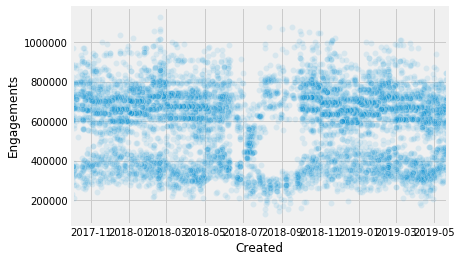

In [8]:
sns.scatterplot(x="Created",y="Engagements",alpha = .1,data=nba_data)
plt.xlim(min(nba_data.Created), max(nba_data.Created))
plt.show()

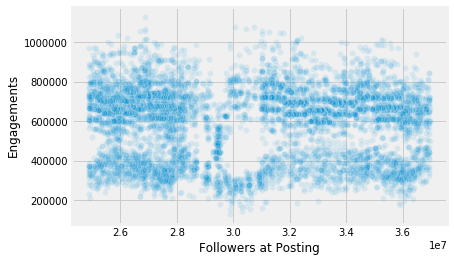

In [9]:
sns.scatterplot(x="Followers at Posting",y="Engagements",alpha = .1,data=nba_data)
plt.show()

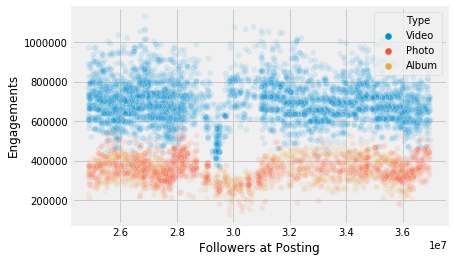

In [10]:
sns.scatterplot(x="Followers at Posting",y="Engagements",alpha = .1,hue="Type",data=nba_data)
plt.show()

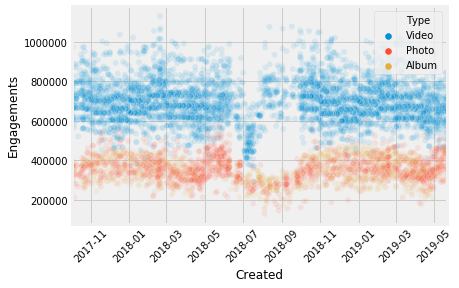

In [11]:
sns.scatterplot(x="Created",y="Engagements",alpha = .1,hue="Type",data=nba_data)
plt.xlim(min(nba_data.Created), max(nba_data.Created))
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.show()

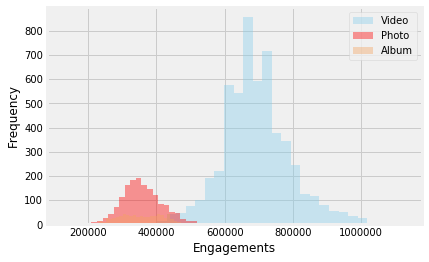

In [12]:
sns.distplot(nba_data[nba_data["Type"] == "Video"].Engagements , color="skyblue", label="Video", kde=False, bins = 30).set(ylabel='Frequency')
sns.distplot(nba_data[nba_data["Type"] == "Photo"].Engagements , color="red", label="Photo", kde=False, bins = 30)
sns.distplot(nba_data[nba_data["Type"] == "Album"].Engagements , color="sandybrown", label="Album", kde=False, bins = 30)
plt.legend()
plt.show()

In [13]:
nba_data['month'] = nba_data.Created.dt.month
nba_data['weekday'] = nba_data.Created.dt.weekday
nba_data['hour'] = nba_data.Created.dt.hour

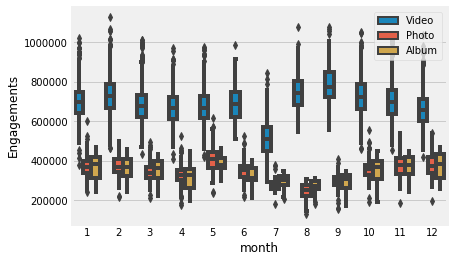

In [14]:
sns.boxplot(x = "month", y = "Engagements", hue="Type",data = nba_data)
plt.legend(loc='upper right')
plt.show()

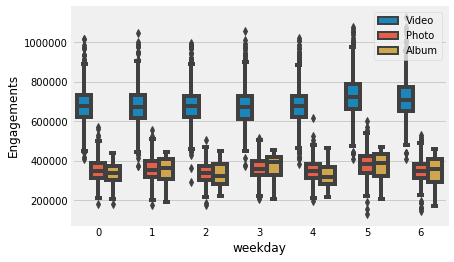

In [15]:
sns.boxplot(x = "weekday", y = "Engagements", hue="Type",data = nba_data)
plt.legend(loc='upper right')
plt.show()

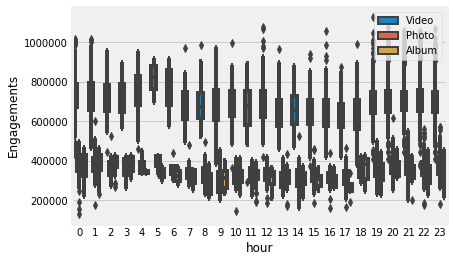

In [16]:
sns.boxplot(x = "hour", y = "Engagements", hue="Type",data = nba_data)
plt.legend(loc='upper right')
plt.show()

In [17]:
nba_data["Description"] = nba_data["Description"].astype(str)

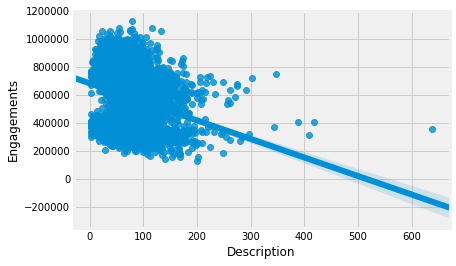

In [18]:
sns.regplot(x=nba_data["Description"].str.len(),y="Engagements",data=nba_data)
plt.show()

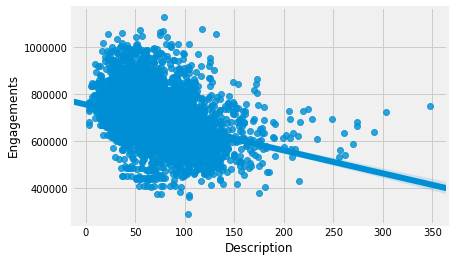

In [19]:
sns.regplot(x=nba_data[nba_data["Type"] == "Video"]["Description"].str.len(),y=nba_data[nba_data["Type"] == "Video"]["Engagements"],data=nba_data)
plt.show()

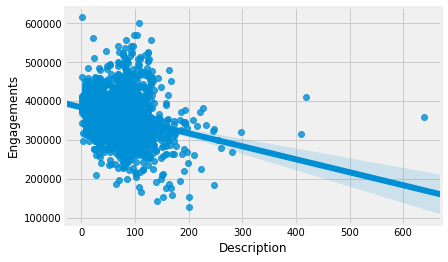

In [20]:
sns.regplot(x=nba_data[nba_data["Type"] == "Photo"]["Description"].str.len(),y=nba_data[nba_data["Type"] == "Photo"]["Engagements"],data=nba_data)
plt.show()

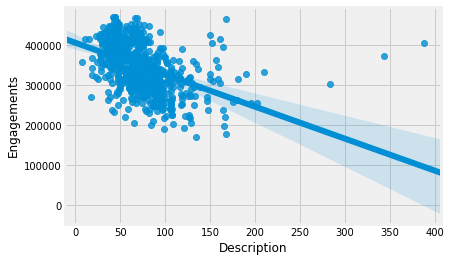

In [21]:
sns.regplot(x=nba_data[nba_data["Type"] == "Album"]["Description"].str.len(),y=nba_data[nba_data["Type"] == "Album"]["Engagements"],data=nba_data)
plt.show()

In [22]:
nba_data["Emoji"] = (nba_data["Description"].str.find("??") != -1)

In [23]:
table = pd.pivot_table(nba_data, values="Engagements", index="Emoji",
                    columns=["month"], aggfunc=np.median)
table

month,1,2,3,4,5,6,7,8,9,10,11,12
Emoji,,,,,,,,,,,,
False,648646.0,663844.0,622328.0,599088.0,605981.0,601293.0,445635.0,564592.5,335640.0,677635.0,645057.0,615662.0
True,690070.5,725543.5,671054.0,647642.5,659809.0,520837.0,496593.0,741285.0,720137.0,714075.0,691758.5,650704.0


In [24]:
nba_data.sort_values(by = "Engagements", ascending = False).head(20)

,Engagements,Followers at Posting,Created,Type,Description,month,weekday,hour,Emoji
5921,1129585,26873604,2018-02-18 19:59:49,Video,The captains meet for pregame #NBAAllStar talk! @kingjames @stephencurry30 ????,2,6,19,True
3699,1077014,30719053,2018-09-16 12:06:15,Video,"30 days from #KiaTipOff18... we flashback to @KingJames scoring his 30,000th point, this past January in San Antonio!",9,6,12,False
3876,1075434,30047470,2018-08-11 20:55:20,Video,At #1 on the TOP 60 DIMES... @kingjames! #NBAAssistWeek,8,5,20,False
5901,1067990,26873604,2018-02-18 23:32:14,Video,@kingjames (29p/10r/8a) hoists the 2018 #NBAAllStar MVP trophy! #KiaAllStarMVP,2,6,23,False
3762,1066099,30442523,2018-09-01 12:18:40,Video,Coming in at No.5...@kyrieirving SOMEHOW finds a way to the rim! #BESTofNBA,9,5,12,False
5912,1059349,26873604,2018-02-18 22:20:39,Video,@kingjames with the left! #NBAAllStar,2,6,22,False
3626,1057987,31009808,2018-09-29 16:10:59,Video,17 days from #KiaTipOff18... @KingJames dished 17 assists without a turnover 3/21/18! \nThe 2018-19 NBA season tips off October 16th!,9,5,16,False
6100,1055161,26706824,2018-02-08 21:03:45,Video,???? @kyrieirving ????,2,3,21,True
3430,1053787,31256836,2018-10-13 22:34:54,Video,"Entering season 16, the best of @kingjames #NBAPreseason! #ThisIsWhyWePlay",10,5,22,False
3160,1049127,31754126,2018-10-30 19:56:20,Video,?? @kyrieirving goes double behind-the-back! #KiaTipOff18,10,1,19,True


In [25]:
nba_data.sort_values(by = "Engagements", ascending = True).head(20)

,Engagements,Followers at Posting,Created,Type,Description,month,weekday,hour,Emoji
3933,127816,29876355,2018-08-04 00:37:27,Photo,Representing #TeamWORLD in the 2018 #NBAAfricaGame (11am/et Saturday ESPN2)... @joelembiid @pskills43 @_cd13 @chiefhasarrived @evanfournier10 @luoldeng9 @7tlc @ianou76 @bismackbiyombo and @sergeibaka!,8,5,0,False
3789,143702,30321656,2018-08-26 10:39:01,Photo,@breannastewart30 of the @seattlestorm named 2018 @wnba MVP! Stewart led Seattle to league-best 26-8 while putting up 21.8ppg/8.4rpg/1.44bpg!,8,6,10,False
3713,154556,30586755,2018-09-09 14:10:31,Photo,"Congratulations to the @lvaces' @aja22wilson on being unanimously selected for Rookie of the Year after leading rookies in PTS, REB & BLK! (repost @wnba)",9,6,14,False
3934,154757,29876355,2018-08-04 00:33:09,Photo,"Representing #TeamWORLD in the 2018 #NBAAfricaGame (11am/et Saturday ESPN2)... Marvin Williams, @rudygay @javalemcgee @k_mid22 @hassanwhiteside @gtemp17 @danilogallogallinari @jcollins20_ and @hbarnes!",8,5,0,False
3613,159402,31026589,2018-09-30 16:48:19,Photo,"?? 3rd straight @FIBA World Cup Gold Medal ??\n?? 22nd straight FIBA win ?? Automatic berth in the 2020 Olympics \nCongratulations, @usabasketball! #USABWNT (repost @wnba)",9,6,16,True
3787,165364,30321656,2018-08-26 17:32:20,Photo,Diana Taurasi becomes the all-time leader in points scored in #WNBAPlayoffs history! #WatchMeWork (repost @wnba),8,6,17,False
3757,170607,30461718,2018-09-02 13:43:49,Album,Two pivotal Game 4s on the #WNBAPlayoffs schedule today. @atlantadream and @seattlestorm sit one game away from the finals. ??: ESPN2,9,6,13,True
3815,175753,30232206,2018-08-21 22:47:54,Photo,"Diana Taurasi becomes the first player in @wnba history with 20+points, 10+ assists and 5+ 3-pointers in a playoff game... as the @phoenixmercury advance! #WNBAPlayoffs",8,1,22,False
641,177134,35918453,2019-04-10 01:54:20,Photo,?? Onto Game 3 ??@ipjh55s BIG night helps the @rgvvipers force a winner-take-all #GLeagueFinals matchup with @longislandnets on Friday! (repost @nbagleague),4,2,1,True
3909,178916,29931799,2018-08-06 13:54:23,Album,The #JrNBAWorldChampionship officially began with a Tip-Off Ceremony & @waltdisneyworld Parade! Pool play games begin Tuesday on @FS1 & @brlive. #ThisIsWhyWePlay @jrnba,8,0,13,False


In [26]:
nba_data["is_alternate_league"] = nba_data.Description.str.contains('wnba|JrNBA|gleague|NBAAfricaGame|FIBA', regex=True)

In [27]:
nba_data["contains_kingjames"] = (nba_data["Description"].str.find("kingjames") != -1)

In [28]:
nba_data["str_len"]=nba_data["Description"].str.len()

In [29]:
nba_data["mention_count"]=nba_data["Description"].str.count("@")

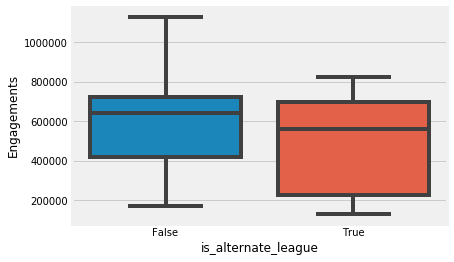

In [30]:
sns.boxplot(x = "is_alternate_league", y = "Engagements",data = nba_data)
plt.show()

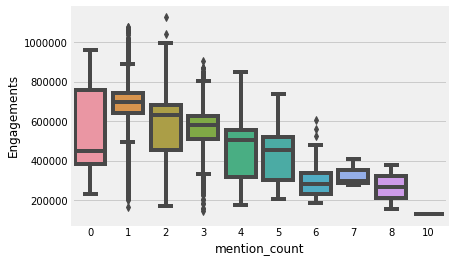

In [31]:
sns.boxplot(x = "mention_count", y = "Engagements",data = nba_data)
plt.show()

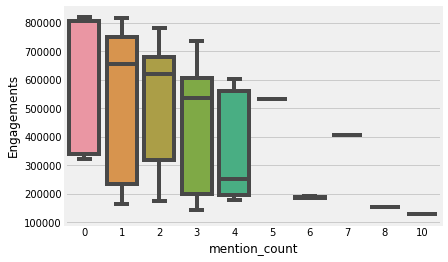

In [32]:
sns.boxplot(x = "mention_count", y = "Engagements",data = nba_data[nba_data["is_alternate_league"] == True])
plt.show()

## modeling

In [33]:
video_data = nba_data[nba_data["Type"] == "Video"]
photo_album_data = nba_data[(nba_data["Type"] == "Photo") | (nba_data["Type"] == "Album")]

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
#https://stackoverflow.com/questions/14940743/selecting-excluding-sets-of-columns-in-pandas
#https://medium.com/@contactsunny/how-to-split-your-dataset-to-train-and-test-datasets-using-scikit-learn-e7cf6eb5e0d
x = video_data.drop(["Engagements", "Created", "Type", "Description"], axis=1)
y = video_data["Engagements"]
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [36]:
print(xTrain.shape)
print(xTest.shape)
print(yTrain.shape)
print(yTest.shape)

(4366, 9)
(1092, 9)
(4366,)
(1092,)


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [38]:
regressor = LinearRegression()  
regressor.fit(xTrain, yTrain) #training the algorithm
#https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

776151.6693316761
[-5.95438562e-04 -5.96957433e+02  6.82366982e+03 -4.91494081e+02
  4.70103026e+04  5.47480686e+03  2.11531039e+05 -1.89838724e+02
 -5.47561960e+04]


In [40]:
y_pred = regressor.predict(xTest)

In [41]:
results = pd.DataFrame({'Actual': yTest.values.flatten(), 'Predicted': y_pred.flatten()})
results["MAPE"] = abs((results["Actual"] - results["Predicted"]) / results["Actual"])
results

,Actual,Predicted,MAPE
0,623190,636979.970802,0.022128
1,774655,735763.718360,0.050205
2,702302,672439.829982,0.042520
3,621426,681392.458946,0.096498
4,645556,643100.051725,0.003804
...,...,...,...
1087,606733,617206.295671,0.017262
1088,823461,790823.979113,0.039634
1089,754398,753514.107689,0.001172
1090,655004,616074.829529,0.059433


In [42]:
print(sum(results["MAPE"]) / len(results["MAPE"]))
print(np.mean(results["Actual"]))
print(np.mean(results["Actual"])*sum(results["MAPE"]) / len(results["MAPE"]))

0.06564305709415007
693375.3003663004
45515.27442961851


In [43]:
#https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/
from sklearn import neighbors

In [46]:
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(xTrain, yTrain)  #fit the model
    pred=model.predict(xTest) #make prediction on test set
    error = sum(abs((yTest - pred) / yTest)) / len(pred)
    print('MAPE value for k= ' , K , 'is:', error)

MAPE value for k=  1 is: 0.11416227699454294
MAPE value for k=  2 is: 0.10336916933283122
MAPE value for k=  3 is: 0.09983895367221204
MAPE value for k=  4 is: 0.10085627221893029
MAPE value for k=  5 is: 0.09848977167255267
MAPE value for k=  6 is: 0.09699207516790266
MAPE value for k=  7 is: 0.0973233486701811
MAPE value for k=  8 is: 0.097855776662043
MAPE value for k=  9 is: 0.09812370953828382
MAPE value for k=  10 is: 0.098347118605745
MAPE value for k=  11 is: 0.09831802398602711
MAPE value for k=  12 is: 0.09810508300778253
MAPE value for k=  13 is: 0.09839294505901992
MAPE value for k=  14 is: 0.09831426817427721
MAPE value for k=  15 is: 0.09809340934529895
MAPE value for k=  16 is: 0.09822353453909628
MAPE value for k=  17 is: 0.09869826785033892
MAPE value for k=  18 is: 0.09908378500365518
MAPE value for k=  19 is: 0.0989622195751628
MAPE value for k=  20 is: 0.09882421963346204


## photo/album

In [47]:
#https://stackoverflow.com/questions/14940743/selecting-excluding-sets-of-columns-in-pandas
#https://medium.com/@contactsunny/how-to-split-your-dataset-to-train-and-test-datasets-using-scikit-learn-e7cf6eb5e0d
x = photo_album_data.drop(["Engagements", "Created", "Type", "Description"], axis=1)
y = photo_album_data["Engagements"]
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [48]:
print(xTrain.shape)
print(xTest.shape)
print(yTrain.shape)
print(yTest.shape)

(1846, 9)
(462, 9)
(1846,)
(462,)


In [49]:
regressor = LinearRegression()  
regressor.fit(xTrain, yTrain) #training the algorithm
#https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

356884.5458357388
[ 1.07015336e-03 -1.55666799e+02  2.02949937e+03 -3.48517778e+02
 -1.47331445e+04 -9.61982463e+04  9.00956958e+04 -1.24238838e+02
 -1.84379960e+04]


In [51]:
y_pred = regressor.predict(xTest)

In [52]:
results = pd.DataFrame({'Actual': yTest.values.flatten(), 'Predicted': y_pred.flatten()})
results["MAPE"] = abs((results["Actual"] - results["Predicted"]) / results["Actual"])
results

,Actual,Predicted,MAPE
0,403544,353738.923357,0.123419
1,233101,370913.444385,0.591213
2,332072,305962.896785,0.078625
3,319289,355968.810038,0.114880
4,319411,335254.749276,0.049603
...,...,...,...
457,320925,274153.036186,0.145741
458,309752,371459.619500,0.199216
459,391707,373204.239573,0.047236
460,352801,380603.719499,0.078806


In [53]:
print(sum(results["MAPE"]) / len(results["MAPE"]))
print(np.mean(results["Actual"]))
print(np.mean(results["Actual"])*sum(results["MAPE"]) / len(results["MAPE"]))

0.11568766707336806
354193.6212121212
40975.83373029851


In [54]:
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(xTrain, yTrain)  #fit the model
    pred=model.predict(xTest) #make prediction on test set
    error = sum(abs((yTest - pred) / yTest)) / len(pred)
    print('MAPE value for k= ' , K , 'is:', error)

MAPE value for k=  1 is: 0.14763392389942684
MAPE value for k=  2 is: 0.1397206248384214
MAPE value for k=  3 is: 0.13687402659818312
MAPE value for k=  4 is: 0.13811232178043584
MAPE value for k=  5 is: 0.13506943195270216
MAPE value for k=  6 is: 0.13427688947939506
MAPE value for k=  7 is: 0.13497719146643614
MAPE value for k=  8 is: 0.132630571899578
MAPE value for k=  9 is: 0.13294095717605917
MAPE value for k=  10 is: 0.13199781113894749
MAPE value for k=  11 is: 0.13143846739962212
MAPE value for k=  12 is: 0.13085225502255826
MAPE value for k=  13 is: 0.129570499546822
MAPE value for k=  14 is: 0.12927641877970722
MAPE value for k=  15 is: 0.12841135279077534
MAPE value for k=  16 is: 0.12895046398070045
MAPE value for k=  17 is: 0.12893104586606322
MAPE value for k=  18 is: 0.1291101579007603
MAPE value for k=  19 is: 0.1294515466724279
MAPE value for k=  20 is: 0.1298084416379032
